In [14]:
import pandas as pd

speed_per_day = pd.read_csv("./metrics-calculation/speed-calculation/statistics/1-speed_per_vehicle_stats.csv")
speed_per_day.head(5)

,day,n_vehicles,n_lines,n_vehicles_lines,avg_speed,avg_speed_min,avg_speed_max,avg_speed_stddev,avg_speed_quantile_6.25,avg_speed_quantile_12.5,avg_speed_quantile_25,avg_speed_quantile_50,avg_speed_quantile_75
0,MO_15101,14004,2071,29702,13.661619,0.216087,43.253766,4.032125,8.105143,9.920853,11.484203,13.491341,15.814732
1,MO_15102,14006,2080,29830,13.472536,0.215484,48.852402,3.969593,7.952510,9.823276,11.361074,13.299600,15.570455
2,MO_15103,10548,1871,20087,13.696948,0.161638,46.956914,4.881822,5.265949,9.167012,11.364083,13.721299,16.477192
3,MO_15104,7614,1751,14131,14.591877,0.167213,47.098071,5.826973,2.898824,8.507270,11.810078,14.891262,18.137630
4,MO_15105,13955,2072,29637,13.699473,0.244892,65.146744,4.040148,8.011532,9.963049,11.551267,13.537739,15.829789


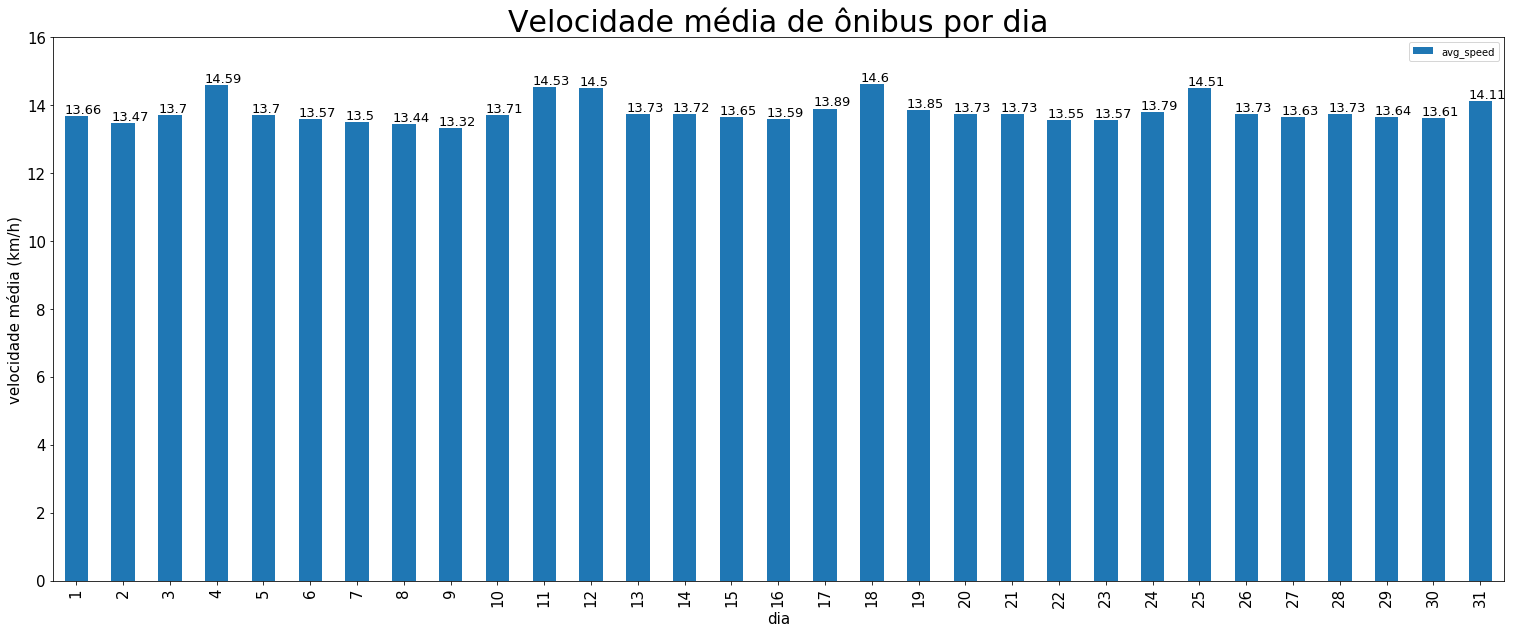

<Figure size 432x288 with 0 Axes>

In [66]:
# average speed per day

day_column = [day for day in range(1,32)]
speed_per_day["day"] = day_column

ax = speed_per_day.plot.bar(x ="day",y = "avg_speed",title=f"Velocidade média de ônibus por dia",figsize=(26,10))
# x axis label
ax.set_xlabel("dia",size=15)
# y axis label
ax.set_ylabel("velocidade média (km/h)",size=15)
# y range
ax.set_ylim(0,16)
# size of the number in both axis
ax.tick_params(axis='both', which='major', labelsize=15)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.00, p.get_height() * 1.006),size=13)
# title fontsize
ax.title.set_size(30)
# saving chart as png
ax.get_figure().savefig('/charts-results/avg-speed-per-day.png')


In [64]:
# Boxplot pandas - https://kanoki.org/2019/09/16/dataframe-visualization-with-pandas-plot/
# Boxplot pandas - https://www.simplypsychology.org/boxplots.html

import matplotlib.pyplot as plt

for i in range(0,31):
    fig, ax = plt.subplots()

    boxes = [
        {
            'label' : f"Intervalos da velocidade média de ônibus no dia {i+1}-10-2015",
            'whislo': speed_per_day["avg_speed_min"][i],    # Bottom whisker position
            'q1'    : speed_per_day["avg_speed_quantile_25"][i],    # First quartile (25th percentile)
            'med'   : speed_per_day["avg_speed_quantile_50"][i],    # Median         (50th percentile)
            'q3'    : speed_per_day["avg_speed_quantile_75"][i],    # Third quartile (75th percentile)
            'whishi': speed_per_day["avg_speed_max"][i],    # Top whisker position
            'fliers': [],        # Outliers,
            'mean':   speed_per_day["avg_speed"][i]
        }
    ]

    ax.bxp(boxes, showfliers=False)


    ax.set_ylabel("velocidade (km/h)")
    plt.plot()
    plt.savefig(f"./charts-results/boxplot-avg-speed-day/avg-speed_day_boxplot_{i+1}-10-2015.png")
    plt.close()

In [79]:
# average speed per hour per day
import pandas as pd
import matplotlib.pyplot as plt

for day in range(1,32):

    speed_per_hour = pd.read_parquet(f"./metrics-calculation/speed-calculation/speed-per-hour-per-day/MO_1510{day}/").sort_values(by=["hour_avl"])

    ax = speed_per_hour.plot(x="hour_avl",y ="avg_speed",title=f"Velocidade média de ônibus por hora",figsize=(26,10))
    # x axis label
    ax.set_xlabel("hora",size=15)
    # y axis label
    ax.set_ylabel("velocidade média (km/h)",size=15)
    # Setting x axis ticks
    plt.xticks([hour for hour in range(6,23)])
    # Title size
    ax.title.set_size(30)

    # size of the number in both axis
    ax.tick_params(axis='both', which='major', labelsize=15)

    # saving chart as png
    ax.get_figure().savefig(f'./charts-results/speed-per-hour-charts/avg-speed-per-hour-day-{day}-10-2015.png')
    plt.close()

In [48]:
len(speed_per_hour)

183194

/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:525: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:525: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:525: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consum

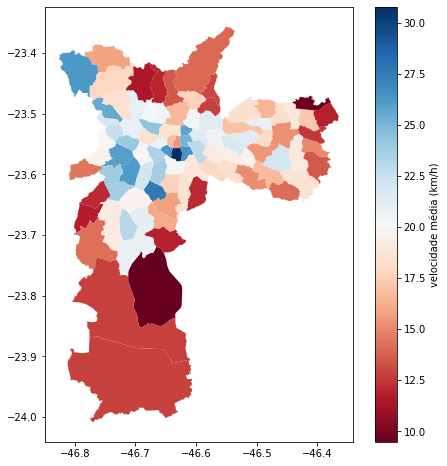

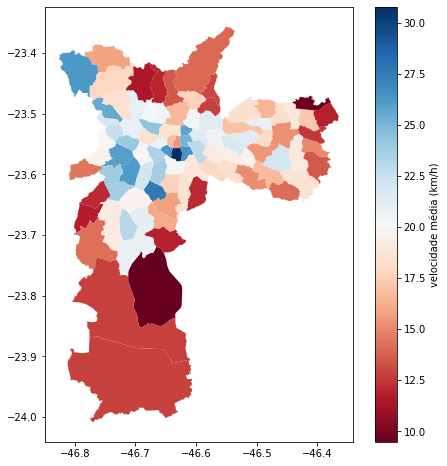

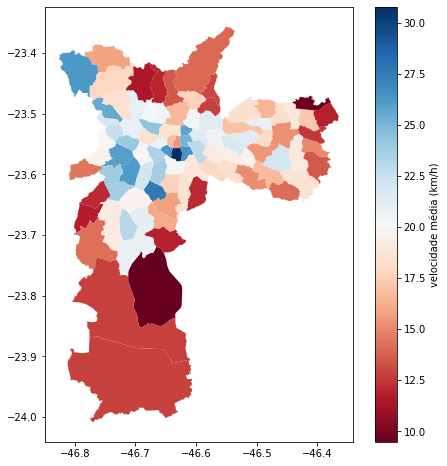

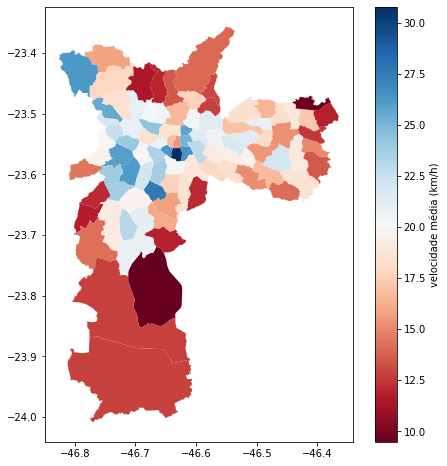

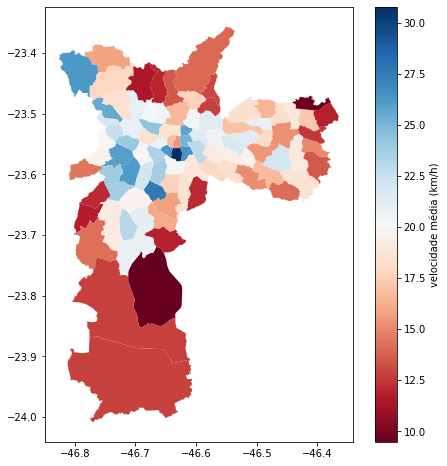

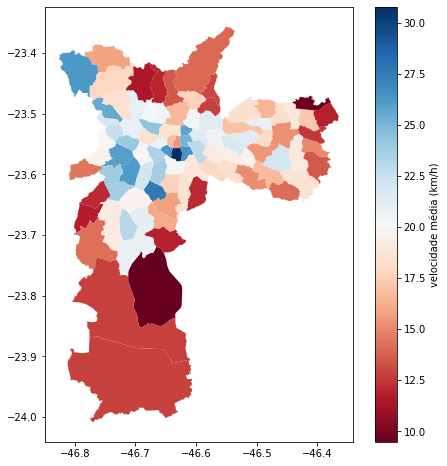

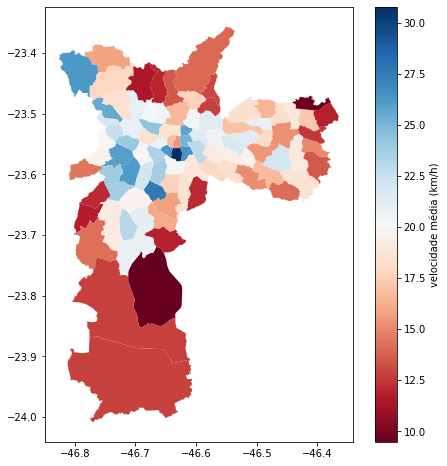

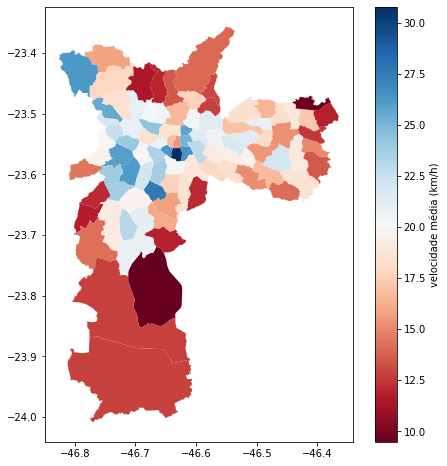

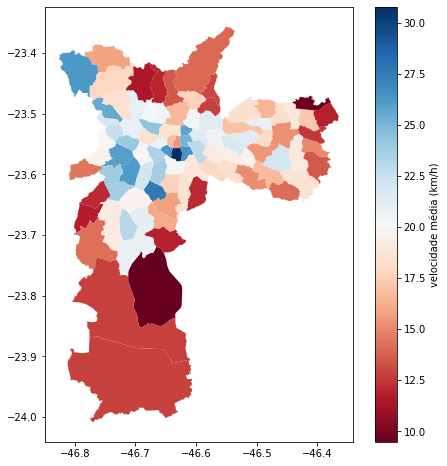

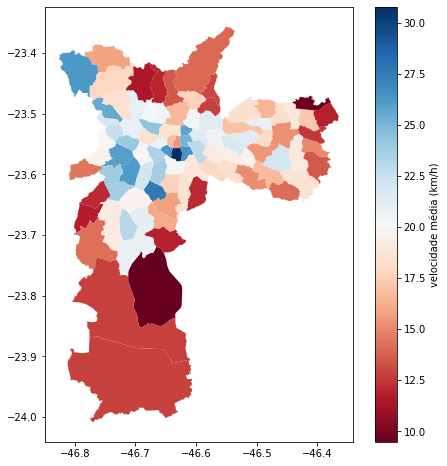

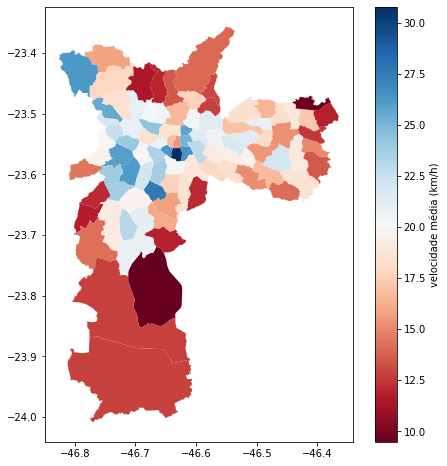

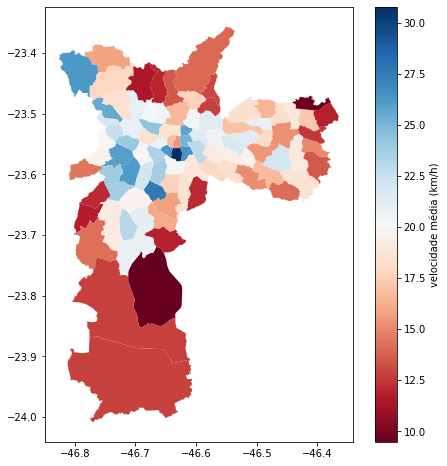

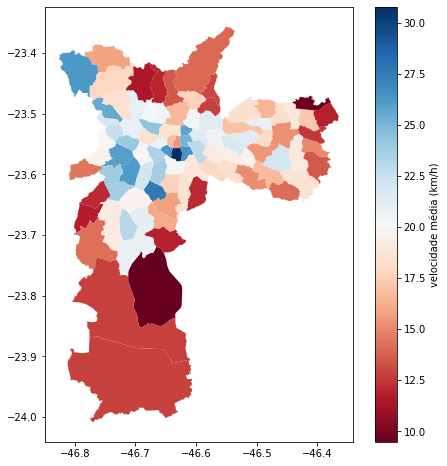

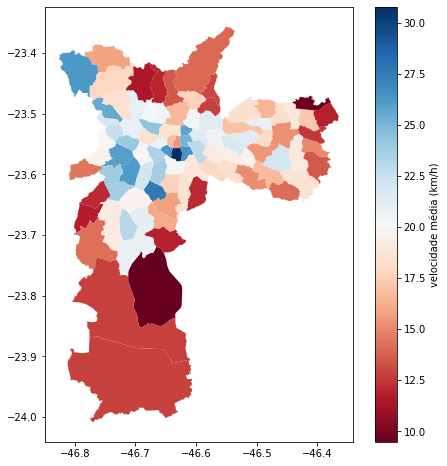

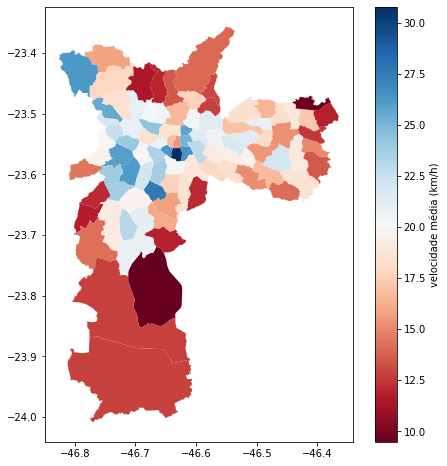

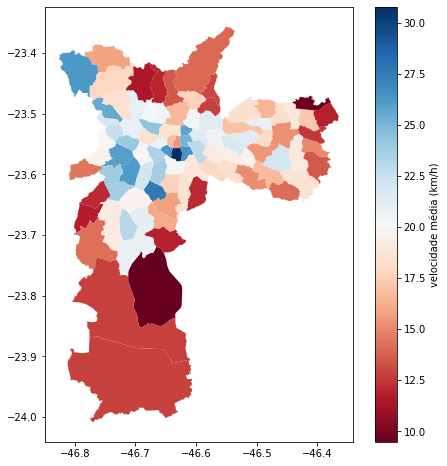

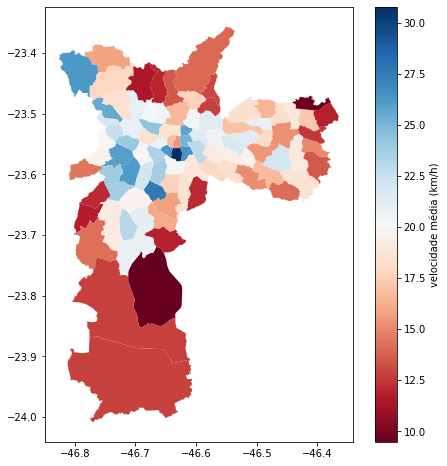

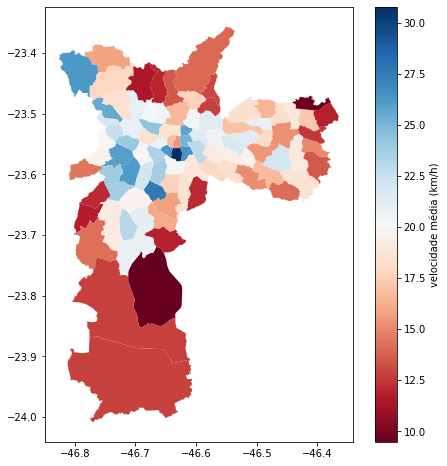

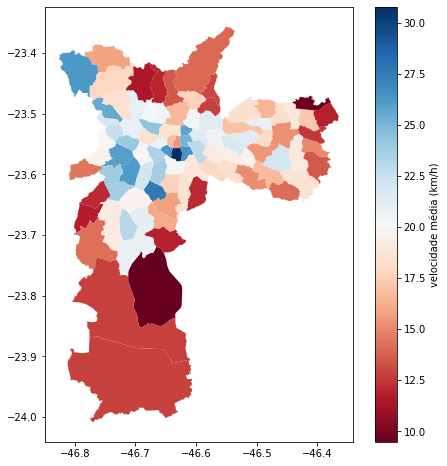

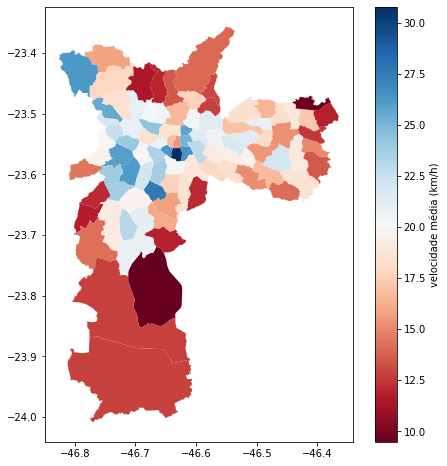

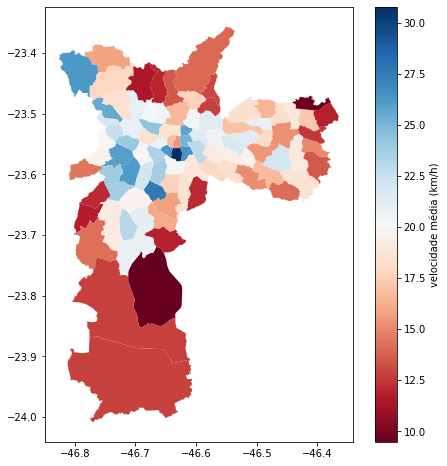

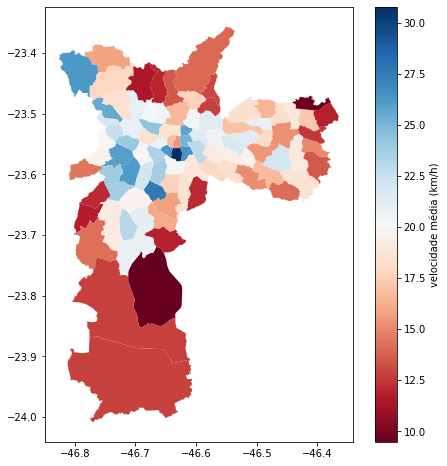

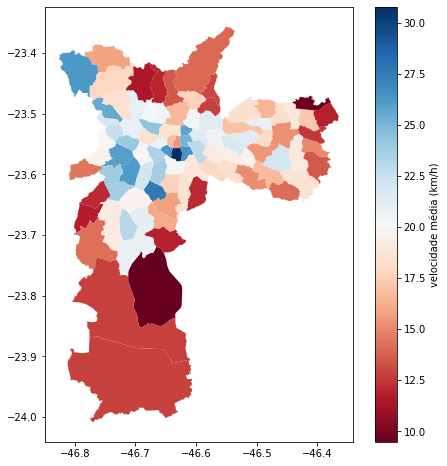

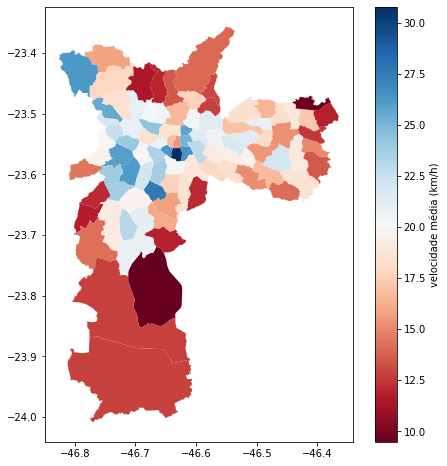

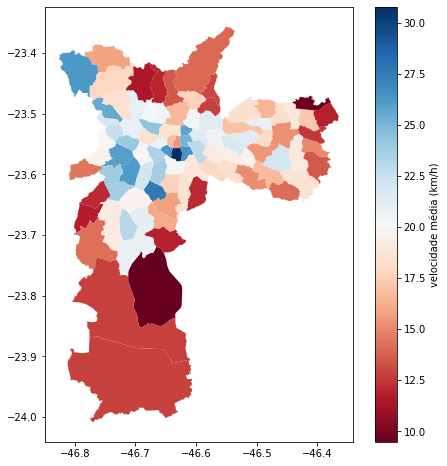

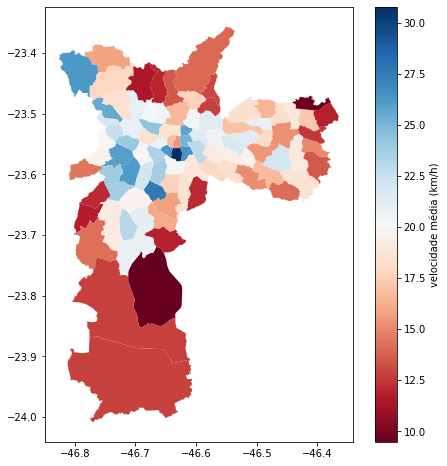

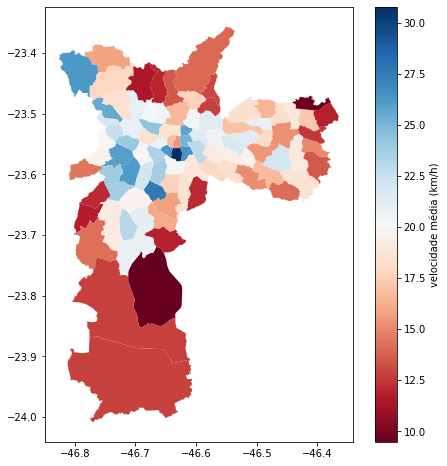

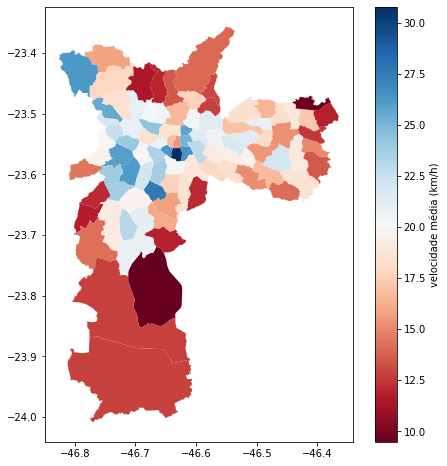

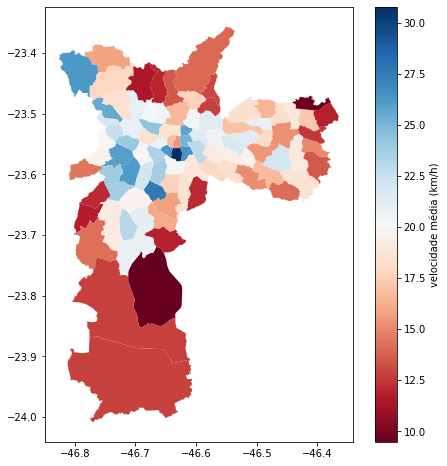

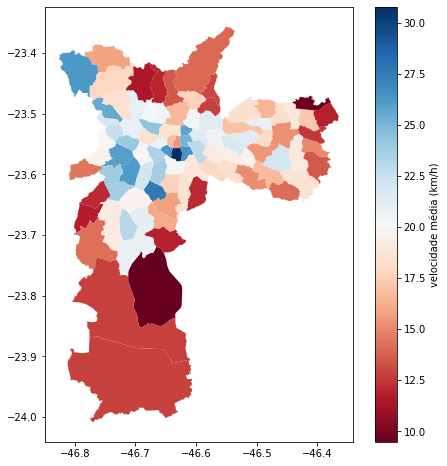

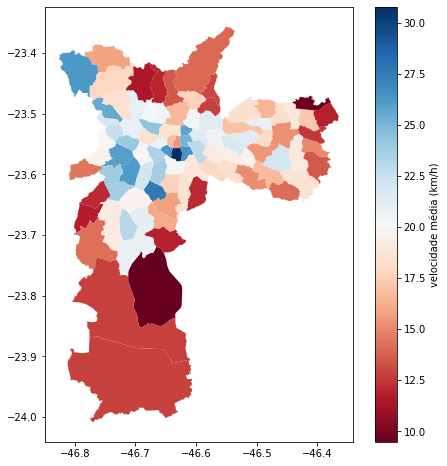

In [118]:
# average speed per region per day
# plotting on map using colormap --> https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

import geopandas as gpd

# Sao Paulo shape
sp = gpd.read_file("./shape-files-sp/DISTRITO_MUNICIPAL_SP_SMDUPolygon.shp")

for day in range(1,32):
    # speed by region per day
    speed_region = pd.read_parquet(f"./metrics-calculation/speed-calculation/speed-per-region-per-day/MO_1510{day}/")
    
    # getting the shape of the region
    df_final = pd.merge(speed_region, sp, left_on = "region", right_on = "Nome").drop(columns = ["Nome"])
    
    geo_df = gpd.GeoDataFrame(df_final, geometry = "geometry")

    # Plotting map
    geo_df.plot(column="avg_speed",legend=True,cmap='RdBu',figsize = (8,8),legend_kwds={'label': "velocidade média (km/h)"})


In [ ]:
### just training

In [ ]:
# PDF/ CDF --> https://stackoverflow.com/questions/25577352/plotting-cdf-of-a-pandas-series-in-python

In [ ]:
# Find distribution 
#ECDF --> https://towardsdatascience.com/how-to-generate-ecdf-plot-using-python-and-r-247ef81fbf3f

In [ ]:
# https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

In [ ]:
#https://www.kite.com/python/answers/how-to-fit-data-to-a-distribution-in-python

In [7]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

(0.8063793041726082, 13.728349835039412, 0.24424789182870021)


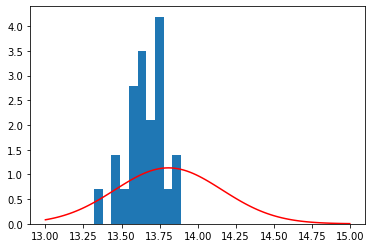

In [51]:
t = scipy.stats.distributions.dgamma.fit(list(speed_per_day["avg_speed"]))

print(t)
x = np.linspace(13,15,100)

df_novo = speed_per_day.loc[speed_per_day["avg_speed"] < 14]

fitted_data = scipy.stats.distributions.norm.pdf(x, mean, var)

plt.hist(list(df_novo["avg_speed"]), density=True)

plt.plot(x,fitted_data,'r-')

In [17]:
dir(scipy.stats.distributions)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_continuous_distns',
 '_discrete_distns',
 'alpha',
 'alpha_gen',
 'anglit',
 'anglit_gen',
 'arcsine',
 'arcsine_gen',
 'argus',
 'argus_gen',
 'bernoulli',
 'bernoulli_gen',
 'beta',
 'beta_gen',
 'betabinom',
 'betabinom_gen',
 'betaprime',
 'betaprime_gen',
 'binom',
 'binom_gen',
 'boltzmann',
 'boltzmann_gen',
 'bradford',
 'bradford_gen',
 'burr',
 'burr12',
 'burr12_gen',
 'burr_gen',
 'cauchy',
 'cauchy_gen',
 'chi',
 'chi2',
 'chi2_gen',
 'chi_gen',
 'cosine',
 'cosine_gen',
 'crystalball',
 'crystalball_gen',
 'dgamma',
 'dgamma_gen',
 'dlaplace',
 'dlaplace_gen',
 'dweibull',
 'dweibull_gen',
 'entropy',
 'erlang',
 'erlang_gen',
 'expon',
 'expon_gen',
 'exponnorm',
 'exponnorm_gen',
 'exponpow',
 'exponpow_gen',
 'exponweib',
 'exponweib_gen',
 'f',
 'f_gen',
 'fatiguelife',
 'fatiguelife_gen',
 'fisk',
 'fisk_gen',
 'foldcauchy',
 'foldcauchy_ge

In [44]:
#https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
#https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data
# https://www.johndcook.com/blog/distributions_scipy/
df = speed_per_day.loc[speed_per_day["avg_speed"]<14]
from scipy import stats
#list_of_dists = ['bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']
list_of_dists = ["expon","gamma","lognorm","norm",'weibull_min','weibull_max',"exponweib"]
# exponencial,gamma,lognormal,normal,weibull
results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(df["avg_speed"])
    a = stats.kstest(df["avg_speed"], i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

norm: statistic=0.12996873495921357, pvalue=0.7446357949756544
lognorm: statistic=0.12998688397716707, pvalue=0.7444865590355183
gamma: statistic=0.1348773846291319, pvalue=0.7037319409934805
exponweib: statistic=0.14057258927757743, pvalue=0.6554642173927729
weibull_min: statistic=0.14342085744591226, pvalue=0.631258160117264
weibull_max: statistic=0.15605527965518895, pvalue=0.5259951197956383
expon: statistic=0.34847167504468557, pvalue=0.003227073975601291


In [ ]:
# https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
# https://github.com/amirarsalan90/dist_fitting_medium/blob/master/dist_fitting.ipynb
# https://glowingpython.blogspot.com/2012/07/distribution-fitting-with-scipy.html

(array([2., 5., 8., 8., 2., 0., 1., 0., 0., 5.]),
 array([13.31919457, 13.4476042 , 13.57601383, 13.70442346, 13.8328331 ,
        13.96124273, 14.08965236, 14.21806199, 14.34647163, 14.47488126,
        14.60329089]),
 <a list of 10 Patch objects>)

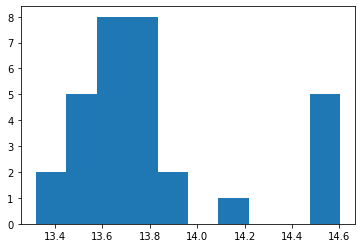

In [31]:
plt.hist(speed_per_day["avg_speed"])

In [32]:
dir(stats)

['F_onewayBadInputSizesWarning',
 'F_onewayConstantInputWarning',
 'PearsonRConstantInputWarning',
 'PearsonRNearConstantInputWarning',
 'SpearmanRConstantInputWarning',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_hypotests',
 '_ksstats',
 '_multivariate',
 '_rvs_sampling',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 '_wilcoxon_data',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'argus',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betabinom',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'brunnermunzel',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_c

In [38]:
data = np.random.normal(0, 0.5, 1000)


t1,t2,t3 = scipy.stats.distributions.gennorm.fit(data)


x = np.linspace(-5,5,100)


(1.9753053701013514, -0.0008095699877689374, 0.6912687108373308)


In [ ]:
(1.9753053701013514, -0.0008095699877689374, 0.6912687108373308)

In [ ]:
list_of_dists = ["expon","gamma","lognomr","norm",'weibull_min','weibull_max']